Importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


Connecting to google drive to access data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir="/content/drive/MyDrive/image dataset/training"

Data augmentation


We are also resizing the image to add filters , max pooling layers and other layers to our CNN model.

In [ ]:

img_size=224
batch_size=32
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                      zoom_range=0.2,
                                                                      shear_range=0.3,
                                                                      horizontal_flip=True)

train_datagenerator=train_datagenerator.flow_from_directory(base_dir,target_size=(img_size,img_size),
                                                      batch_size=32)



Found 1127 images belonging to 4 classes.


In [ ]:
train_labels = (train_datagenerator.class_indices)


In [ ]:
train_labels

{'cloud': 0, 'fog': 1, 'rain': 2, 'sunrise': 3}

Creating our CNN model.

Our biggest disadvantage was the computational power of my local machine.
We could look for a more cloud bases or distributed file system model.

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))


In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:

cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics='accuracy')


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 4)                 802820    
                                                                 
Total params: 804,612
Trainable params: 804,612
Non-trainable params: 0
_________________________________________________________________


In [ ]:

epoch=5
history=cnn.fit(train_datagenerator,epochs=epoch,batch_size=32)

Epoch 1/5
36/36 [==============================] - 603s 17s/step - loss: 1.5780 - accuracy: 0.5972
Epoch 2/5
36/36 [==============================] - 41s 1s/step - loss: 0.5174 - accuracy: 0.8075
Epoch 3/5
36/36 [==============================] - 41s 1s/step - loss: 0.4297 - accuracy: 0.8296
Epoch 4/5
36/36 [==============================] - 46s 1s/step - loss: 0.4042 - accuracy: 0.8492
Epoch 5/5
36/36 [==============================] - 40s 1s/step - loss: 0.3932 - accuracy: 0.8492


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as img


In [ ]:
testing_images_base_path="/content/drive/MyDrive/image dataset/testing"

In [ ]:
just_image_names=["unknown_1.jpg","unknown_2.jpg","unknown_3.jpg","unknown_4.jpg","unknown_5.jpg"]


In [ ]:
key_train_labels=list(train_labels.keys())

In [ ]:
value_train_labels=list(train_labels.values())

Looping images for testing

In [ ]:
predicted_list=[]

/content/drive/MyDrive/image dataset/testing/unknown_1.jpg


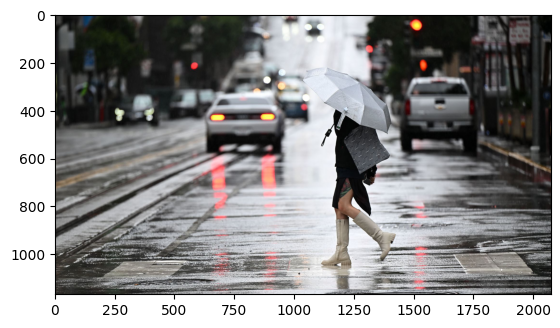

1/1 [==============================] - 0s 64ms/step
rain
/content/drive/MyDrive/image dataset/testing/unknown_2.jpg


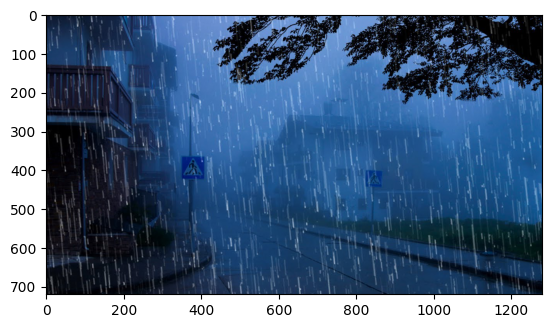

1/1 [==============================] - 0s 27ms/step
sunrise
/content/drive/MyDrive/image dataset/testing/unknown_3.jpg


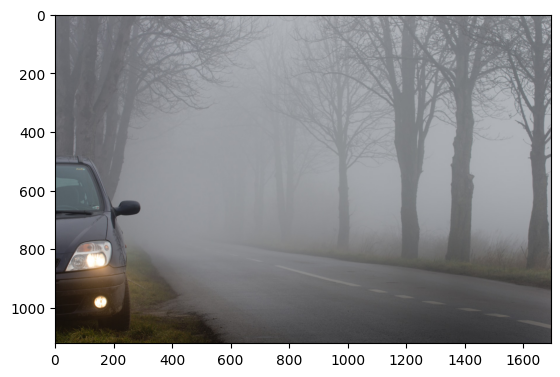

1/1 [==============================] - 0s 26ms/step
fog
/content/drive/MyDrive/image dataset/testing/unknown_4.jpg


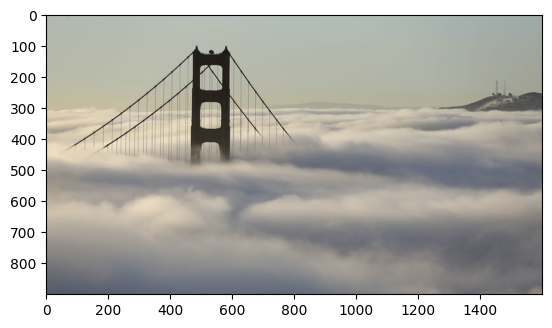

1/1 [==============================] - 0s 29ms/step
fog
/content/drive/MyDrive/image dataset/testing/unknown_5.jpg


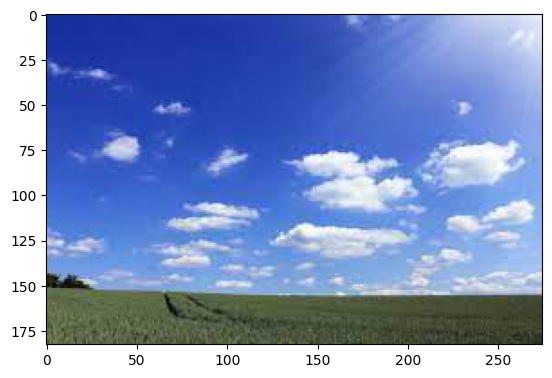

1/1 [==============================] - 0s 30ms/step
sunrise


In [ ]:
for name in just_image_names:
  test_image_path=testing_images_base_path+"/"+ name
  print(test_image_path)
  Image = img.imread(test_image_path)
  # displaying the image 
  plt.imshow(Image)
  plt.show()
  img_1 = tf.keras.utils.load_img(test_image_path, target_size=(224,224))
  img_1 = tf.keras.utils.img_to_array(img_1, dtype=np.uint8)
  predicted_array = cnn.predict(img_1[np.newaxis])
  for i in predicted_array:
    for j in range(0,4):
      if i[j] == 1:
       position=value_train_labels.index(j)
  print(key_train_labels[position])
 

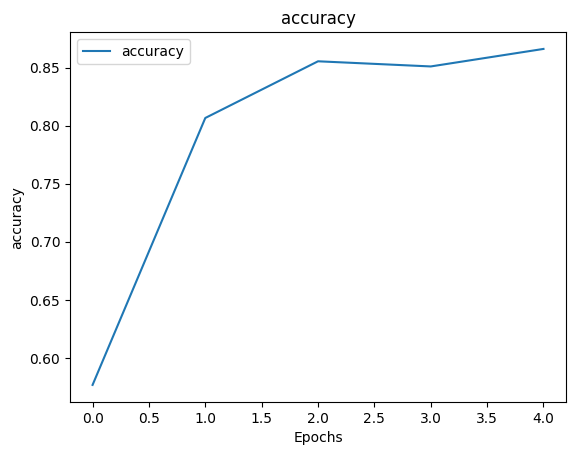

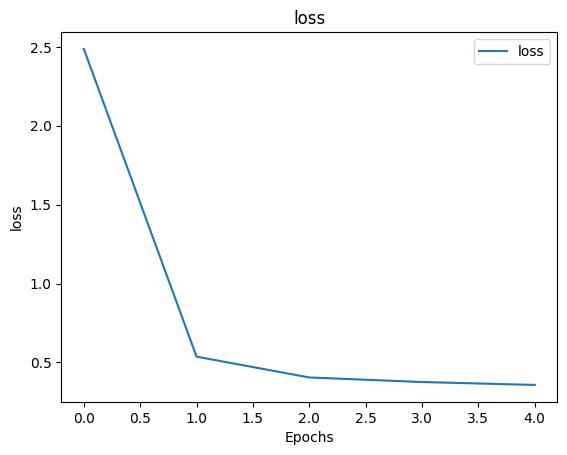

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")